In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import predict 

In [26]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [27]:
def normalize(x):
    x_min = x.min()
    x_max = x.max()
    x_normalized = (x - x_min) / (x_max - x_min)
    return x_normalized

x = normalize(x)

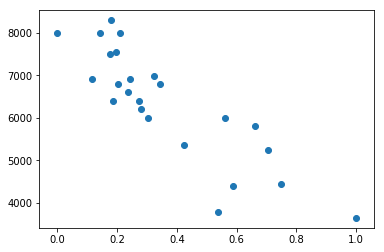

In [28]:
plt.scatter(x, y)

In [29]:
y = y.reshape(y.shape[0],1)

In [30]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(24, 2)

In [31]:
theta = predict.get_params()
print(theta)


Unvalid file
theta0 and theta1 are null


SystemExit: 

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
def model(X, theta):
    return X.dot(theta)

In [ ]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [ ]:
cost_function(X, y, theta)

In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [ ]:
learning_rate=0.01
n_iterations=28500
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

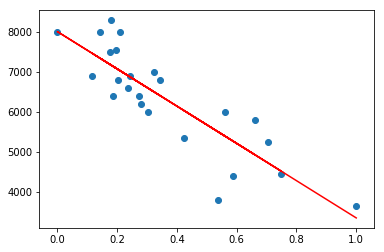

In [32]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

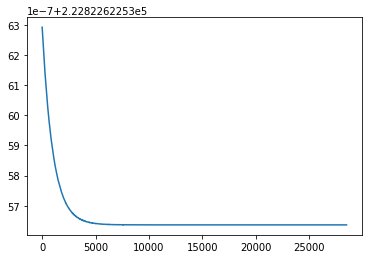

In [33]:
plt.plot(range(n_iterations), cost_history)

In [34]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [35]:
coef_determination(y, predictions)

0.73297470783149654

In [36]:
def MoindreCarre(x, y):
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
        
    npoints = len(x)
    a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
    b = (x2_sum * y_sum - x_sum * xy_sum) / (npoints * x2_sum - x_sum**2)
    return a, b

In [37]:
a, b = MoindreCarre(x, y)

In [38]:
print("Valeur de theta[0] avec la methode des moindres carre: ", a)
print("Valeur de theta[1] avec la methode des moindres carre: ", b)

Valeur de theta[0] avec la methode des moindres carre:  [-4656.59144472]
Valeur de theta[1] avec la methode des moindres carre:  [ 8008.43983265]


In [39]:
theta_final

array([[-4656.59144472],
       [ 8008.43983265]])

In [40]:
def save_theta(a, b):
    with open('params.txt', 'w') as file:
        thetas = file.write(f'{a} \n{b}')

In [41]:
save_theta(float(theta_final[0]), float(theta_final[1]))